In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing  import StandardScaler, MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_selection import mutual_info_classif
# !pip install scikit-learn-extra
# from sklearn_extra.cluster import KMedoids


# Preprocessing

In [184]:
df = pd.read_csv('https://raw.githubusercontent.com/SenyuminAja16/2-Faza-Grace/refs/heads/master/Data/asia_df.csv')
df.head(5)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15:00,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Armenia,Yerevan,40.18,44.51,Asia/Yerevan,1715849100,2024-05-16 12:45:00,19.0,66.2,Partly cloudy,...,0.8,0.9,1,1,05:45 AM,08:12 PM,01:17 PM,02:31 AM,Waxing Gibbous,55
2,Azerbaijan,Baku,40.40,49.88,Asia/Baku,1715849100,2024-05-16 12:45:00,17.0,62.6,Partly cloudy,...,1.9,2.2,1,1,05:23 AM,07:51 PM,12:54 PM,02:10 AM,Waxing Gibbous,55
3,Bahrain,Manama,26.24,50.58,Asia/Bahrain,1715849100,2024-05-16 11:45:00,36.0,96.8,Sunny,...,39.0,114.3,2,4,04:50 AM,06:18 PM,12:10 PM,12:45 AM,Waxing Gibbous,55
4,Bangladesh,Dhaka,23.72,90.41,Asia/Dhaka,1715849100,2024-05-16 14:45:00,38.4,101.2,Partly Cloudy,...,49.7,57.0,3,6,05:16 AM,06:34 PM,12:28 PM,12:58 AM,Waxing Gibbous,55


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13650 entries, 0 to 13649
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       13650 non-null  object 
 1   location_name                 13650 non-null  object 
 2   latitude                      13650 non-null  float64
 3   longitude                     13650 non-null  float64
 4   timezone                      13650 non-null  object 
 5   last_updated_epoch            13650 non-null  int64  
 6   last_updated                  13650 non-null  object 
 7   temperature_celsius           13650 non-null  float64
 8   temperature_fahrenheit        13650 non-null  float64
 9   condition_text                13650 non-null  object 
 10  wind_mph                      13650 non-null  float64
 11  wind_kph                      13650 non-null  float64
 12  wind_degree                   13650 non-null  int64  
 13  w

In [186]:
missing_values = df.isna().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [187]:
columns_to_drop = ["country", "location_name", "latitude", "longitude", "timezone", "last_updated_epoch", "last_updated", "sunrise", "sunset", "moonrise", "moonset", "moon_phase", "moon_illumination", 'condition_text', 'wind_direction', 'wind_degree']
df.drop(columns=columns_to_drop, inplace=True)
df.head(5)

,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,...,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index
0,26.6,79.8,8.3,13.3,1012.0,29.89,0.00,0.00,24,30,...,9.5,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1
1,19.0,66.2,4.3,6.8,1017.0,30.03,0.13,0.01,40,25,...,6.2,9.9,186.9,103.0,1.0,0.3,0.8,0.9,1,1
2,17.0,62.6,4.3,6.8,1020.0,30.12,0.00,0.00,68,50,...,4.6,7.4,227.0,81.5,7.1,1.8,1.9,2.2,1,1
3,36.0,96.8,13.6,22.0,1007.0,29.74,0.00,0.00,33,0,...,18.1,29.2,397.2,100.1,18.5,9.7,39.0,114.3,2,4
4,38.4,101.2,4.3,6.8,1006.0,29.71,0.00,0.00,31,30,...,4.9,7.9,520.7,188.8,8.7,4.7,49.7,57.0,3,6


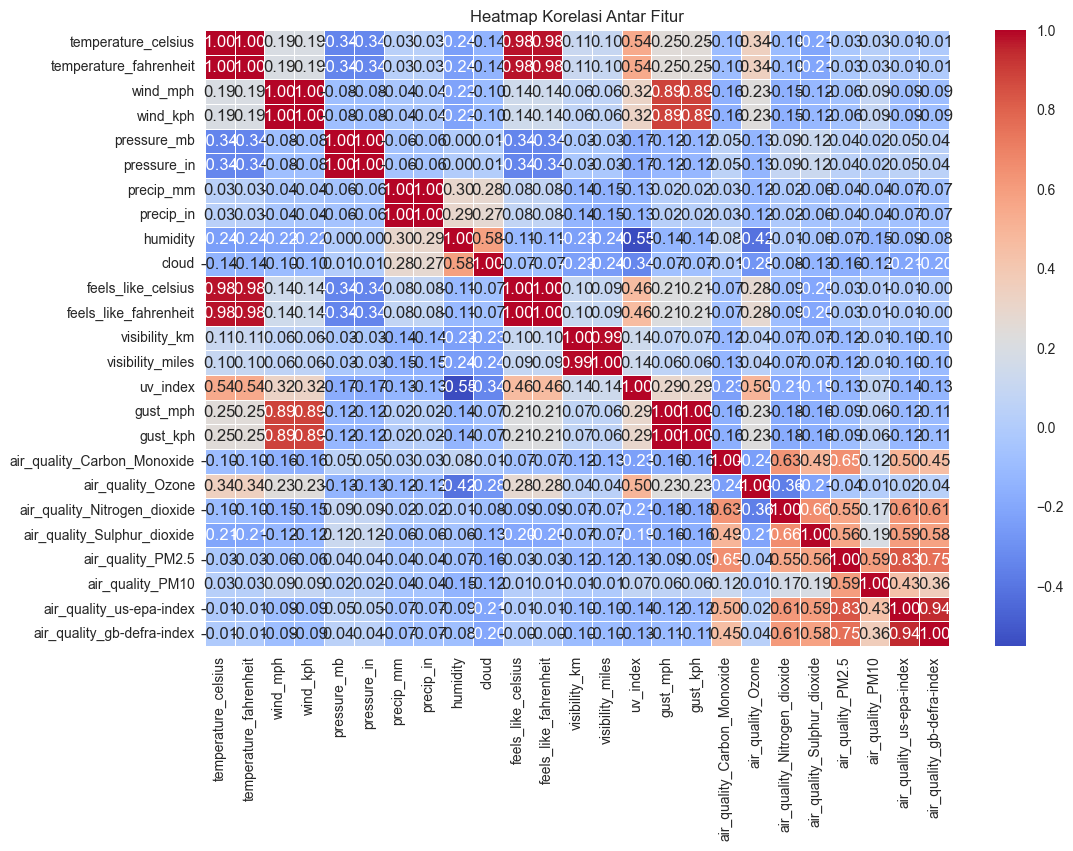

In [188]:
numeric_features = df.select_dtypes(include='number').columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [189]:
column_multikolinearitas = ['gust_mph', 'feels_like_fahrenheit', 'temperature_fahrenheit', 'air_quality_gb-defra-index', 'wind_mph', 'pressure_in', 'visibility_miles', 'precip_in', 'feels_like_celsius', 'gust_kph', 'precip_mm', 'air_quality_us-epa-index']
df.drop(columns=column_multikolinearitas, inplace=True)
df.head(5)

,temperature_celsius,wind_kph,pressure_mb,humidity,cloud,visibility_km,uv_index,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10
0,26.6,13.3,1012.0,24,30,10.0,7.0,277.0,103.0,1.1,0.2,8.4,26.6
1,19.0,6.8,1017.0,40,25,10.0,4.0,186.9,103.0,1.0,0.3,0.8,0.9
2,17.0,6.8,1020.0,68,50,10.0,5.0,227.0,81.5,7.1,1.8,1.9,2.2
3,36.0,22.0,1007.0,33,0,10.0,8.0,397.2,100.1,18.5,9.7,39.0,114.3
4,38.4,6.8,1006.0,31,30,10.0,9.0,520.7,188.8,8.7,4.7,49.7,57.0


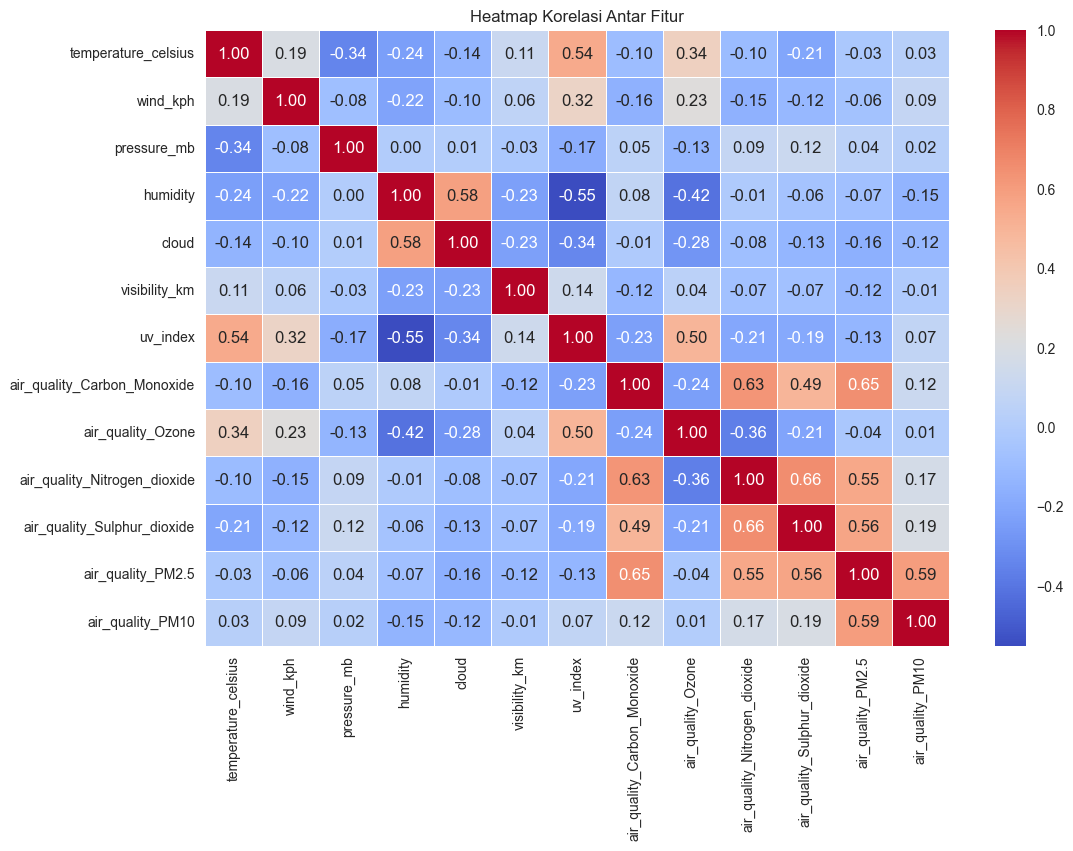

In [190]:
numeric_features = df.select_dtypes(include='number').columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

In [191]:
column = ['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Sulphur_dioxide', 'air_quality_Nitrogen_dioxide', 'air_quality_PM2.5', 'air_quality_PM10']
df = df[column]

In [192]:
df_negatif = df[df.lt(0).any(axis=1)]
df_negatif


,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Sulphur_dioxide,air_quality_Nitrogen_dioxide,air_quality_PM2.5,air_quality_PM10
13588,432.9,81.0,28.675,23.68,639.175,-1848.15


In [193]:
df = df[~df.lt(0).any(axis=1)]


In [194]:
# numeric_features = df.select_dtypes(include='number').columns

# for col in numeric_features:
#     df[col] = df[col].apply(lambda x: df[col].median() if x == 0 else x)
    
# df.head(5)

In [195]:
numeric_features = df.select_dtypes(include='number').columns
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [196]:
df.head(5)

,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Sulphur_dioxide,air_quality_Nitrogen_dioxide,air_quality_PM2.5,air_quality_PM10
0,-0.398371,0.578599,-0.697199,-0.772190,-0.600001,-0.225669
1,-0.451405,0.578599,-0.694714,-0.774898,-0.740402,-0.321482
2,-0.427802,0.136487,-0.657445,-0.609713,-0.720081,-0.316635
3,-0.327621,0.518966,-0.461161,-0.301006,-0.034701,0.101289
4,-0.254929,2.342935,-0.585391,-0.566385,0.162969,-0.112333


# Modeling

## K-Means

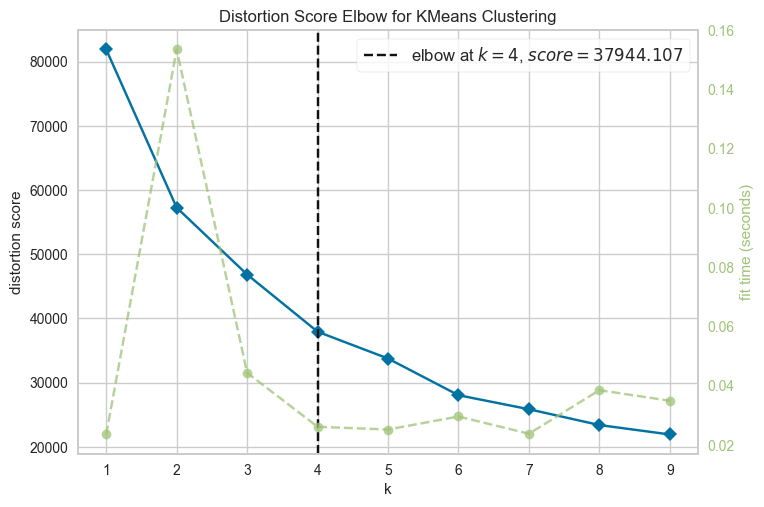

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [197]:
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(df)
visualizer.show()

In [215]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df)
labels_kmeans = kmeans.labels_

In [216]:
def analyze_clusters(X, labels, k, feature_names):
    print('Analisis Karakteristik Setiap Cluster:\n')

    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        mean_values = cluster_data.mean(axis=0)

        print(f'--- Cluster {cluster_id + 1} ---')
        for feature, mean_val in zip(feature_names, mean_values):
            print(f'{feature}: {mean_val:.2f}')
        print('\n')

analyze_clusters(df, labels_kmeans, k, numeric_features)

Analisis Karakteristik Setiap Cluster:

--- Cluster 1 ---
air_quality_Carbon_Monoxide: -0.23
air_quality_Ozone: -0.29
air_quality_Sulphur_dioxide: 0.82
air_quality_Nitrogen_dioxide: 0.59
air_quality_PM2.5: 5.29
air_quality_PM10: 12.61


--- Cluster 2 ---
air_quality_Carbon_Monoxide: -0.29
air_quality_Ozone: 0.21
air_quality_Sulphur_dioxide: -0.43
air_quality_Nitrogen_dioxide: -0.49
air_quality_PM2.5: -0.35
air_quality_PM10: -0.16


--- Cluster 3 ---
air_quality_Carbon_Monoxide: 3.99
air_quality_Ozone: -1.09
air_quality_Sulphur_dioxide: 2.90
air_quality_Nitrogen_dioxide: 2.99
air_quality_PM2.5: 2.82
air_quality_PM10: 0.55


--- Cluster 4 ---
air_quality_Carbon_Monoxide: 0.31
air_quality_Ozone: -0.44
air_quality_Sulphur_dioxide: 0.81
air_quality_Nitrogen_dioxide: 0.98
air_quality_PM2.5: 0.53
air_quality_PM10: 0.14




In [217]:
sil_score = silhouette_score(df, labels_kmeans)
print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.41


In [220]:
dbi = davies_bouldin_score(df, labels_kmeans)
print(f"Davies-Bouldin Index (K-Means): {dbi:.2f}")


Davies-Bouldin Index (K-Means): 1.02


In [219]:
ch_index = calinski_harabasz_score(df, labels_kmeans)
print(f"Calinski-Harabasz Index (K-Means): {ch_index:.2f}")


Calinski-Harabasz Index (K-Means): 5268.24


## DBSCAN

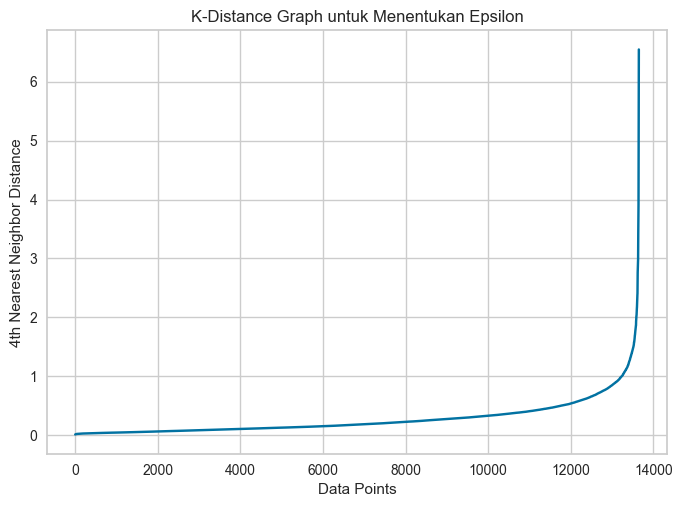

In [203]:
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(df)
distances, indices = neigh.kneighbors(df)
distances = np.sort(distances[:, 4], axis=0)

plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("4th Nearest Neighbor Distance")
plt.title("K-Distance Graph untuk Menentukan Epsilon")
plt.show()

In [221]:
db = DBSCAN(eps=1.6, min_samples=12)
db.fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels_dbscan = db.labels_

['y', 'b', 'g', 'r']


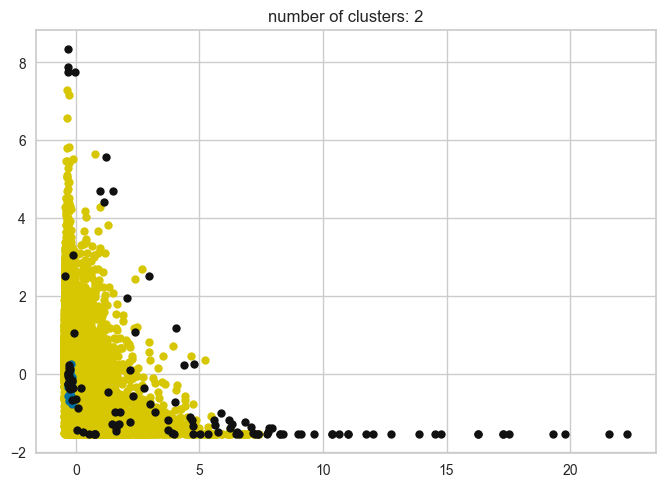

In [222]:
n_clusters_ = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
unique_labels = set(labels_dbscan)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_member_mask = (labels_dbscan == k)
    xy = df[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [223]:
def analyze_clusters_dbscan(X, labels, feature_names):
    unique_clusters = set(labels)
    
    print('Analisis Karakteristik Setiap Cluster:\n')

    for cluster_id in unique_clusters:
        if cluster_id == -1:
            print('--- Cluster Noise (Outlier) ---')
        else:
            print(f'--- Cluster {cluster_id} ---')

        cluster_data = X[labels == cluster_id]
        
        if len(cluster_data) == 0:
            print('Cluster kosong.\n')
            continue

        mean_values = cluster_data.mean(axis=0)

        for feature, mean_val in zip(feature_names, mean_values):
            print(f'{feature}: {mean_val:.2f}')
        print('\n')

analyze_clusters_dbscan(df, labels_dbscan, numeric_features)


Analisis Karakteristik Setiap Cluster:

--- Cluster 0 ---
air_quality_Carbon_Monoxide: -0.04
air_quality_Ozone: 0.00
air_quality_Sulphur_dioxide: -0.03
air_quality_Nitrogen_dioxide: -0.03
air_quality_PM2.5: -0.05
air_quality_PM10: -0.05


--- Cluster 1 ---
air_quality_Carbon_Monoxide: -0.22
air_quality_Ozone: -0.32
air_quality_Sulphur_dioxide: 0.78
air_quality_Nitrogen_dioxide: 0.60
air_quality_PM2.5: 5.14
air_quality_PM10: 12.73


--- Cluster Noise (Outlier) ---
air_quality_Carbon_Monoxide: 4.98
air_quality_Ozone: -0.38
air_quality_Sulphur_dioxide: 3.13
air_quality_Nitrogen_dioxide: 3.00
air_quality_PM2.5: 5.18
air_quality_PM10: 3.79




In [224]:
sil_score = silhouette_score(df, labels_dbscan)
print(f'Silhouette Score: {sil_score:.2f}')

Silhouette Score: 0.80


In [225]:
dbi = davies_bouldin_score(df, labels_dbscan)
print(f"Davies-Bouldin Index (K-Means): {dbi:.2f}")

Davies-Bouldin Index (K-Means): 1.08


In [226]:
ch_index = calinski_harabasz_score(df, labels_dbscan)
print(f"Calinski-Harabasz Index (K-Means): {ch_index:.2f}")

Calinski-Harabasz Index (K-Means): 1353.04


## Hierarchial

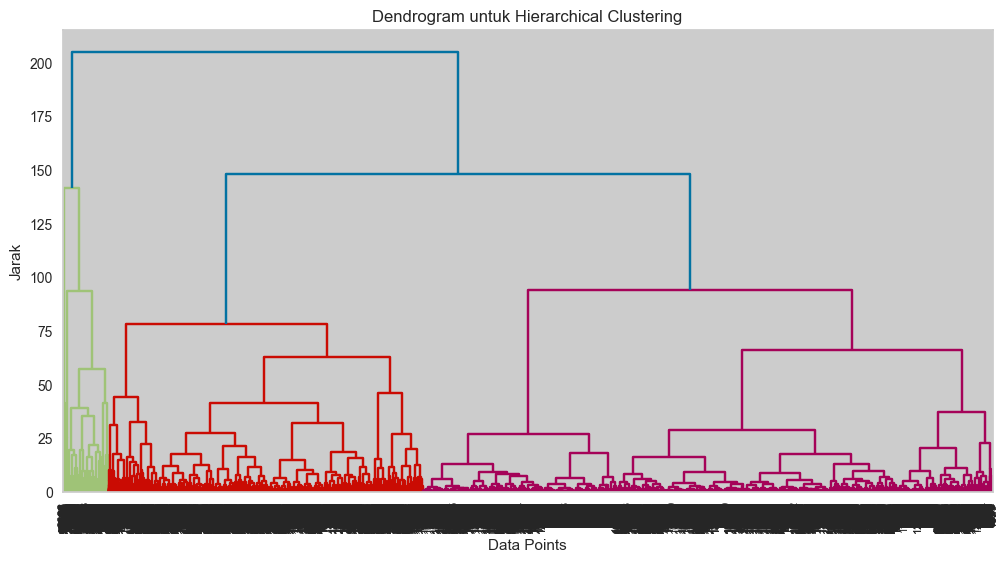

In [ ]:
# plt.figure(figsize=(12, 6))
# linkage_matrix = linkage(df, method='ward')
# dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90, leaf_font_size=8)
# plt.title("Dendrogram untuk Hierarchical Clustering")
# plt.xlabel("Data Points")
# plt.ylabel("Jarak")
# plt.show()

In [227]:
linkage_matrix = linkage(df, method='ward')
num_clusters = 3
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

In [228]:
sil_score = silhouette_score(df, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.3241


# Coba binning

In [213]:
df_binned = pd.DataFrame()
bins = 4
for col in column:
    df_binned[col + "_binned"] = pd.qcut(df[col], q=bins, labels=[1, 2, 3, 4])

In [214]:
binned_columns = [col + '_binned' for col in column]
df_binned = df[binned_columns]

KeyError: "None of [Index(['air_quality_Carbon_Monoxide_binned', 'air_quality_Ozone_binned',\n       'air_quality_Sulphur_dioxide_binned',\n       'air_quality_Nitrogen_dioxide_binned', 'air_quality_PM2.5_binned',\n       'air_quality_PM10_binned'],\n      dtype='object')] are in the [columns]"

In [ ]:
scaler = StandardScaler()
df_binned = scaler.fit_transform(df_binned)

In [ ]:
kmedoids = KMedoids(n_clusters=4, random_state=42, metric='euclidean')
kmedoids.fit(df)

KMedoids(n_clusters=4, random_state=42)

In [ ]:
sil_score = silhouette_score(df, clusters)
print(f"Silhouette Score: {sil_score:.4f}")


Silhouette Score: 0.5079
